In [1]:
import os
import shutil
import numpy as np
import pandas as pd   
from sklearn.model_selection import train_test_split   

In [2]:
!unzip Data.zip

Archive:  Data.zip
replace __MACOSX/._Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'Data'
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Create directories for the split data
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to split data
def split_data(class_dir, train_dir, val_dir, test_dir, test_size=0.20):
    # Get filenames
    files = os.listdir(class_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
    test_files, val_files = train_test_split(test_files, test_size=0.50, random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, file))

# Iterate over each class and split the data
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Create class directories in train, val, and test
    for directory in [train_dir, val_dir, test_dir]:
        class_directory = os.path.join(directory, class_name)
        if not os.path.exists(class_directory):
            os.makedirs(class_directory)

    # Split and copy files
    split_data(class_dir, os.path.join(train_dir, class_name), os.path.join(val_dir, class_name), os.path.join(test_dir, class_name))

print("Data split into train, validation, and test sets.")

Data split into train, validation, and test sets.


In [4]:
# Directory paths
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Classes
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']

# Function to calculate size of each class
def calculate_class_sizes(dir_path, classes):
    return {class_name: len(os.listdir(os.path.join(dir_path, class_name))) for class_name in classes}

# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 4448 images
 - Calculus: 1036 images (23.29% of train set)
 - Caries: 175 images (3.93% of train set)
 - Gingivitis: 1879 images (42.24% of train set)
 - hypodontia: 1000 images (22.48% of train set)
 - Ulcer: 212 images (4.77% of train set)
 - Tooth Discoloration: 146 images (3.28% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


/var/folders/hn/5fpc0nwn3l5dqrb9wq8zr_w80000gn/T/ipykernel_14526/2005837930.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names, rotation=45, ha='right')


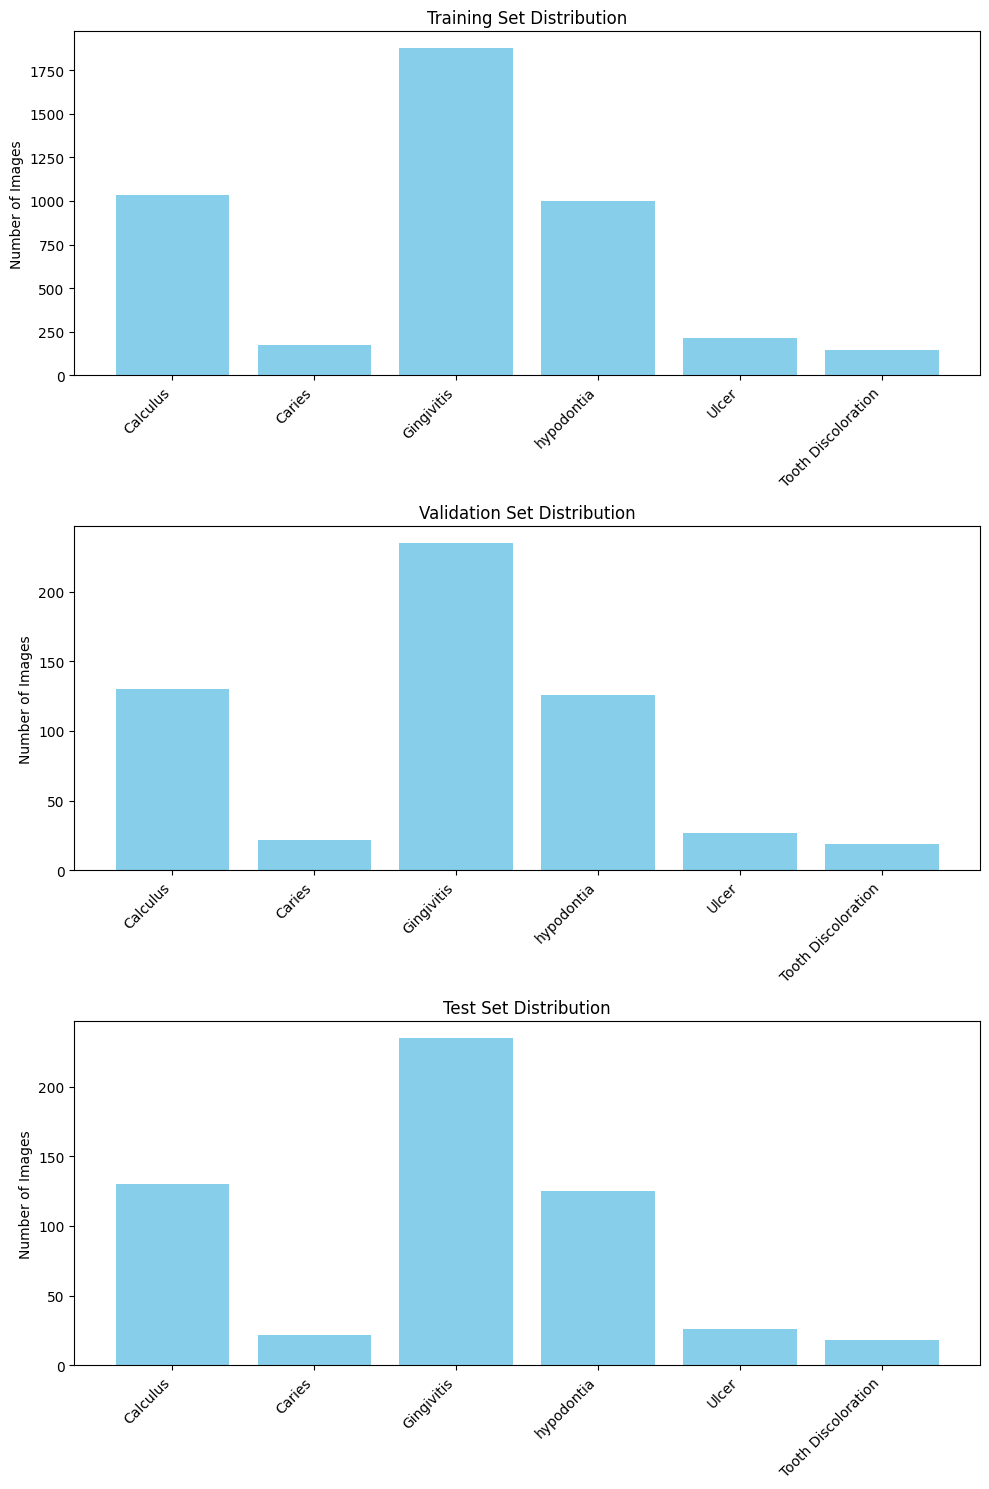

In [5]:
import matplotlib.pyplot as plt

# Assuming the sizes are already calculated as in your previous code
# train_sizes, val_sizes, test_sizes

# Data for plotting
class_names = list(train_sizes.keys())
train_counts = list(train_sizes.values())
val_counts = list(val_sizes.values())
test_counts = list(test_sizes.values())

# Function to create a bar plot
def create_bar_plot(ax, counts, title):
    ax.bar(class_names, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_ylabel('Number of Images')

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot data
create_bar_plot(axes[0], train_counts, 'Training Set Distribution')
create_bar_plot(axes[1], val_counts, 'Validation Set Distribution')
create_bar_plot(axes[2], test_counts, 'Test Set Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
pip install keras


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import random
import tensorflow as tf        
import keras 
from keras.preprocessing.image import ImageDataGenerator 

train_dir = 'Train'

# Function to perform oversampling
def oversample_class(class_dir, target_count):
    files = os.listdir(class_dir)
    while len(files) < target_count:
        chosen_file = random.choice(files)
        new_file = f'oversampled_{random.randint(1, 10000)}_{chosen_file}'
        shutil.copy(os.path.join(class_dir, chosen_file), os.path.join(class_dir, new_file))
        files.append(new_file)

target_counts = {
    'Caries': 1000,
    'Ulcer': 1000,
    'Tooth Discoloration': 1000
}

for class_name, target_count in target_counts.items():
    class_dir = os.path.join(train_dir, class_name)
    oversample_class(class_dir, target_count)


In [9]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6915 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 1000 images (14.46% of train set)
 - Gingivitis: 1879 images (27.17% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


In [10]:
import tensorflow as tf


# Define augmentation settings
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_class_images(class_dir, augment_times, is_underrepresented):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img.reshape((1,) + img.shape)  # Reshape image

        # Adjust augmentation times for underrepresented classes
        if is_underrepresented:
            actual_augment_times = augment_times
        else:
            actual_augment_times = augment_times // 4  # Reduce for well-represented classes

        # Generate augmented images
        i = 0
        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= actual_augment_times:
                break

# Define which classes are underrepresented
underrepresented_classes = ['Caries', 'Ulcer', 'Tooth Discoloration']

# Apply augmentation
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    is_underrepresented = class_name in underrepresented_classes
    augment_class_images(class_dir, augment_times=2, is_underrepresented=is_underrepresented)

In [13]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 15999 images
 - Calculus: 2016 images (12.60% of train set)
 - Caries: 2821 images (17.63% of train set)
 - Gingivitis: 3592 images (22.45% of train set)
 - hypodontia: 1939 images (12.12% of train set)
 - Ulcer: 2826 images (17.66% of train set)
 - Tooth Discoloration: 2805 images (17.53% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


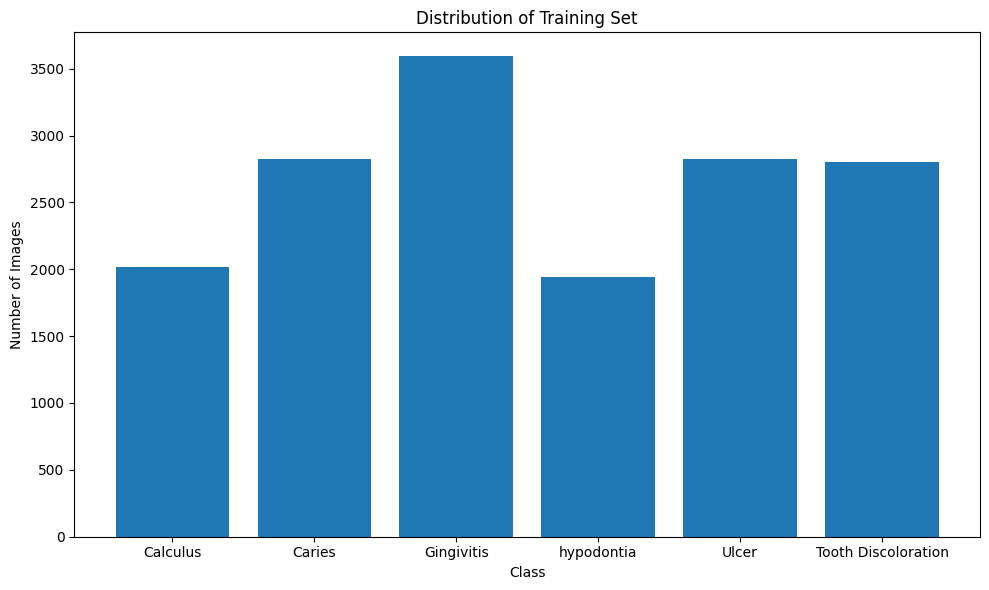

In [12]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

def display_images(image_paths, cols=3, rows=2, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for img_path, ax in zip(image_paths, axes):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(os.path.dirname(img_path)))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

data_dir = 'Train'
num_images_to_display = 3  # Number of images to display for each class

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        selected_images = random.sample(image_files, min(len(image_files), num_images_to_display))
        selected_image_paths = [os.path.join(class_dir, img) for img in selected_images]
        display_images(selected_image_paths, cols=num_images_to_display, rows=1)

In [15]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from PIL import Image

def load_images(data_dir, size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.array(img).flatten())
            labels.append(class_names.index(class_name))

    return np.array(images), np.array(labels), class_names

# Load and preprocess the data
data_dir = 'Train'  # Replace with your dataset directory
X, y, class_names = load_images(data_dir)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))